In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

%matplotlib inline

In [3]:
df = pd.read_csv('../metrics/training_confusion.csv')

In [8]:
breeds = np.unique(df['actual'].values)

In [15]:
cm = confusion_matrix(df['actual'], df['pred'], labels=breeds)
#sns.set(font_scale=0.9)

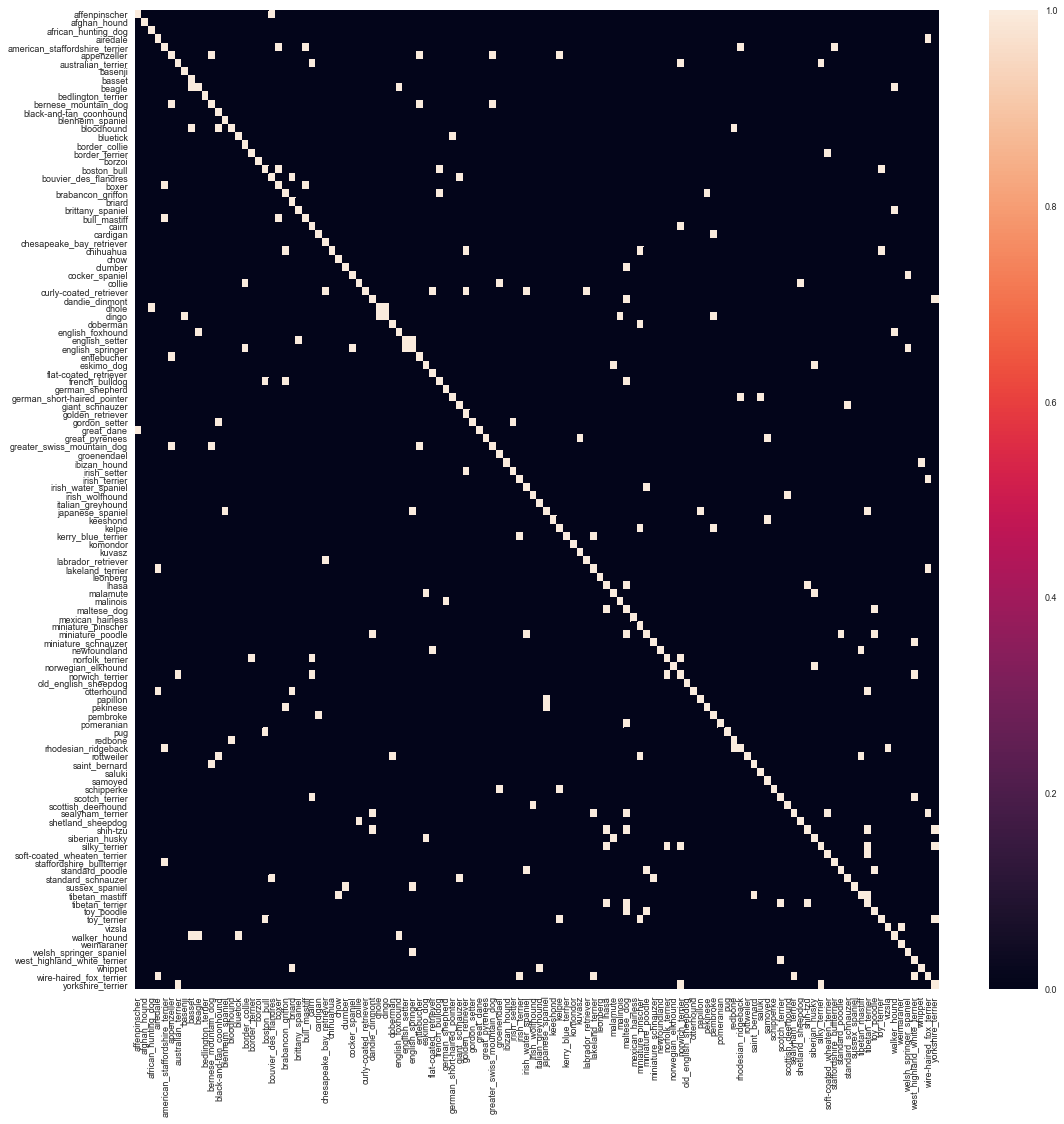

In [16]:
fig, ax = plt.subplots(figsize=(18, 18))
_ = sns.heatmap(cm, ax=ax, yticklabels=breeds, xticklabels=breeds, robust=True)

In [14]:
pd.DataFrame(zip(cm[-1], breeds), columns=['confusion', 'breed']).sort_values(['confusion'], ascending=False).take(range(0, 10))

,confusion,breed
119,161,yorkshire_terrier
6,1,australian_terrier
81,1,norwich_terrier
102,1,silky_terrier
76,0,miniature_poodle
88,0,pug
87,0,pomeranian
86,0,pembroke
85,0,pekinese
84,0,papillon
